In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agriculture-data-analysis/AgricultureData.csv


In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/agriculture-data-analysis/AgricultureData.csv")

# Check first few rows
df.head()


product_id product_name   category  price_per_kg  \
0  b12c721e-8301-4b08-8ac3-d435be9b8b32         Lamb  Livestock         14.10   
1  4a0f8862-c851-4073-bc17-3a3d93834902         Beef  Livestock         11.37   
2  be996df6-1780-4352-8b7d-1f927279aa49      Oranges     Fruits          2.59   
3  6c8adfc3-2114-4b78-a3e2-2269a6a0dc02         Milk      Dairy          1.34   
4  0bd5bf2b-be0a-4ba0-aa92-059021b169e3      Bananas     Fruits          1.78   

   units_shipped_kg  units_sold_kg  units_on_hand_kg           supplier  \
0             19224          14905              4319  Organic Meats Co.   
1             29504           4550             24954  Organic Meats Co.   
2              1838           1722               116       Berry Fields   
3              6750           1232              5518  Fresh Dairy Farms   
4             48729          47020              1709    Golden Orchards   

         farm_location   sale_date  
0     O'Reillyboro, OR  2022-07-04  
1        Lake Nora, AR  2023-10-21  
2  East Friedaside, NM  2023-12-24  
3       East Javon, FL  2023-12-25  
4    Lake D'angelo, MN  2023-06-20

In [3]:
#information about data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8893 entries, 0 to 8892
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        8893 non-null   object 
 1   product_name      8893 non-null   object 
 2   category          8893 non-null   object 
 3   price_per_kg      8893 non-null   float64
 4   units_shipped_kg  8893 non-null   int64  
 5   units_sold_kg     8893 non-null   int64  
 6   units_on_hand_kg  8893 non-null   int64  
 7   supplier          8893 non-null   object 
 8   farm_location     8893 non-null   object 
 9   sale_date         8893 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 694.9+ KB


In [4]:
#statistical summary 
df.describe()


price_per_kg  units_shipped_kg  units_sold_kg  units_on_hand_kg
count   8893.000000       8893.000000    8893.000000       8893.000000
mean       3.641478      25471.785562   12545.278421      12926.507140
std        3.306348      14177.334372   10772.529049      10996.124845
min        0.400000       1005.000000       0.000000          0.000000
25%        0.970000      13228.000000    3642.000000       3890.000000
50%        2.680000      25468.000000    9643.000000       9805.000000
75%        5.300000      37964.000000   18832.000000      19622.000000
max       14.390000      50000.000000   49726.000000      49818.000000

In [5]:
#check is null values 
df.isnull().sum



<bound method DataFrame.sum of       product_id  product_name  category  price_per_kg  units_shipped_kg  \
0          False         False     False         False             False   
1          False         False     False         False             False   
2          False         False     False         False             False   
3          False         False     False         False             False   
4          False         False     False         False             False   
...          ...           ...       ...           ...               ...   
8888       False         False     False         False             False   
8889       False         False     False         False             False   
8890       False         False     False         False             False   
8891       False         False     False         False             False   
8892       False         False     False         False             False   

      units_sold_kg  units_on_hand_kg  supplier  farm_lo

In [6]:
# to know about the cols name 
df.columns

Index(['product_id', 'product_name', 'category', 'price_per_kg',
       'units_shipped_kg', 'units_sold_kg', 'units_on_hand_kg', 'supplier',
       'farm_location', 'sale_date'],
      dtype='object')

In [7]:
# to know the datatype of cols
df.dtypes

product_id           object
product_name         object
category             object
price_per_kg        float64
units_shipped_kg      int64
units_sold_kg         int64
units_on_hand_kg      int64
supplier             object
farm_location        object
sale_date            object
dtype: object

In [8]:
df['sale_date']=pd.to_datetime(df['sale_date'],errors='coerce')



In [9]:
df['sale_date'].dtype


dtype('<M8[ns]')

In [10]:
df['Year']=df['sale_date'].dt.year
df['month']=df['sale_date'].dt.month
df['day']=df['sale_date'].dt.day

In [11]:
df['Sales'] = df['price_per_kg'] * df['units_sold_kg']
df.groupby(df['sale_date'].dt.month)['Sales'].sum().plot(
    kind='line',
    title="Monthly Sales Trend",
    ylabel="Total Sales",
    xlabel="Month"
)


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month', ylabel='Total Sales'>

In [12]:
# Suppose you want total sales for 2023
year = 2023

# Filter rows for that year and sum the Sales column
total_sales = df[df['sale_date'].dt.year == year]['Sales'].sum()

print(f"Total sales in {year}: {total_sales}")


Total sales in 2023: 204094385.59


In [13]:
df.groupby(df['sale_date'].dt.year)['Sales'].sum().plot(
    kind='line',
    title='yearly sales trend',
    ylabel="total sales",
    xlabel="year"
)

<Axes: title={'center': 'yearly sales trend'}, xlabel='year', ylabel='total sales'>

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # show first 10 unique values
    print("------")


product_id: 28 unique values
['b12c721e-8301-4b08-8ac3-d435be9b8b32'
 '4a0f8862-c851-4073-bc17-3a3d93834902'
 'be996df6-1780-4352-8b7d-1f927279aa49'
 '6c8adfc3-2114-4b78-a3e2-2269a6a0dc02'
 '0bd5bf2b-be0a-4ba0-aa92-059021b169e3'
 '1c48eb53-85bc-4b76-92ef-97d240a8a227'
 '3b87981b-375b-494a-9b11-00bf7144143a'
 '921530a1-c4d1-4e94-b8ad-11f6fbcc4fca'
 '9bb2d8db-a7ac-4d40-9d3c-0c96cafe7153'
 '8dc0c292-d59b-4692-bcc4-2003c0177ea7']
------
product_name: 28 unique values
['Lamb' 'Beef' 'Oranges' 'Milk' 'Bananas' 'Potatoes' 'Pork' 'Rice'
 'Butter' 'Peppers']
------
category: 5 unique values
['Livestock' 'Fruits' 'Dairy' 'Vegetables' 'Grains']
------
supplier: 20 unique values
['Organic Meats Co.' 'Berry Fields' 'Fresh Dairy Farms' 'Golden Orchards'
 "Nature's Best Produce" 'Fresh Harvest Co.' 'Ranchers Pride'
 'Midwest Grains Co.' 'Happy Cows Dairy' 'Prime Meats LLC']
------
farm_location: 8862 unique values
["O'Reillyboro, OR" 'Lake Nora, AR' 'East Friedaside, NM' 'East Javon, FL'
 "Lake D'ang

In [15]:
#spotting ouliers 
df[['price_per_kg', 'units_shipped_kg', 'units_sold_kg']].describe()



price_per_kg  units_shipped_kg  units_sold_kg
count   8893.000000       8893.000000    8893.000000
mean       3.641478      25471.785562   12545.278421
std        3.306348      14177.334372   10772.529049
min        0.400000       1005.000000       0.000000
25%        0.970000      13228.000000    3642.000000
50%        2.680000      25468.000000    9643.000000
75%        5.300000      37964.000000   18832.000000
max       14.390000      50000.000000   49726.000000

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['price_per_kg', 'units_shipped_kg', 'units_sold_kg']

# Create a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Price, Units Shipped, and Units Sold")
plt.ylabel("Values")
plt.show()


* price_per_kg is on a much smaller scale than units_shipped_kg and units_sold_kg.
--> suggests price isn’t the main driver of variation here—quantities matter more.
* Median shipped > median sold --> indicates over-shipment or unsold inventory.
* units_shipped_kg looks more symmetric -> shipments are planned in a predictable    range.
  units_sold_kg is skewed with many outliers -> demand is unpredictable for some     products.
    hence,shipments arw consistent but the sale is variable may be due to              forecasting demand

**Stable prices but volatile sales volumes suggest that pricing is not the main factor affecting sales—other factors like demand cycles, product popularity, or like the seasons may affect it. **



In [17]:
# Create a new column: efficiency ratio
df['sales_to_shipment_ratio'] = df['units_sold_kg'] / df['units_shipped_kg']

# Basic stats
print(df['sales_to_shipment_ratio'].describe())

# Boxplot of efficiency
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sales_to_shipment_ratio'])
plt.title("Sales-to-Shipment Efficiency Ratio")
plt.xlabel("Ratio (Units Sold / Units Shipped)")
plt.show()


count    8893.000000
mean        0.494180
std         0.285551
min         0.000000
25%         0.249222
50%         0.488099
75%         0.739953
max         1.000000
Name: sales_to_shipment_ratio, dtype: float64


Some shipments completely failed (0% sold), and about 25% of shipments sold only a quarter of what was sent. The majority of shipments are inefficient, with half selling less than 50%. Only the top 25% of shipments perform well, selling around 75% of stock, and a few shipments achieve perfect sales at 100%. This shows the business has a few strong products, but overall, shipment planning and demand forecasting need serious improvement.

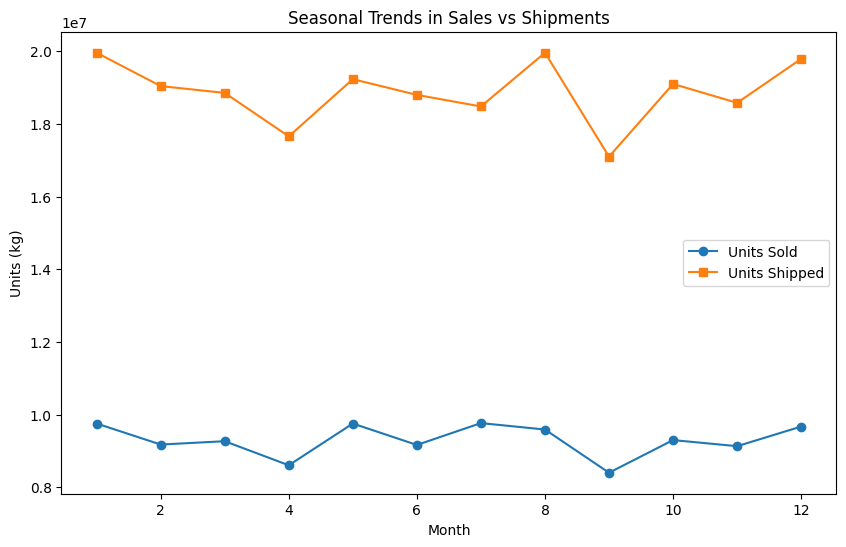

In [18]:
# Convert to datetime if not already
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Extract month or quarter
df['month'] = df['sale_date'].dt.month

# Group by month
monthly_sales = df.groupby('month')['units_sold_kg'].sum()
monthly_shipments = df.groupby('month')['units_shipped_kg'].sum()

# Plot trends
plt.figure(figsize=(10,6))
monthly_sales.plot(label='Units Sold', marker='o')
monthly_shipments.plot(label='Units Shipped', marker='s')
plt.title("Seasonal Trends in Sales vs Shipments")
plt.xlabel("Month")
plt.ylabel("Units (kg)")
plt.legend()
plt.show()


The month-wise trend shows that units shipped are consistently higher than units sold, indicating planned inventory exceeds actual demand.

Sales peak in May and July, while shipments peak in January, August, and December, highlighting seasonal demand fluctuations. 

The gap in certain months, like September, suggests potential overstock

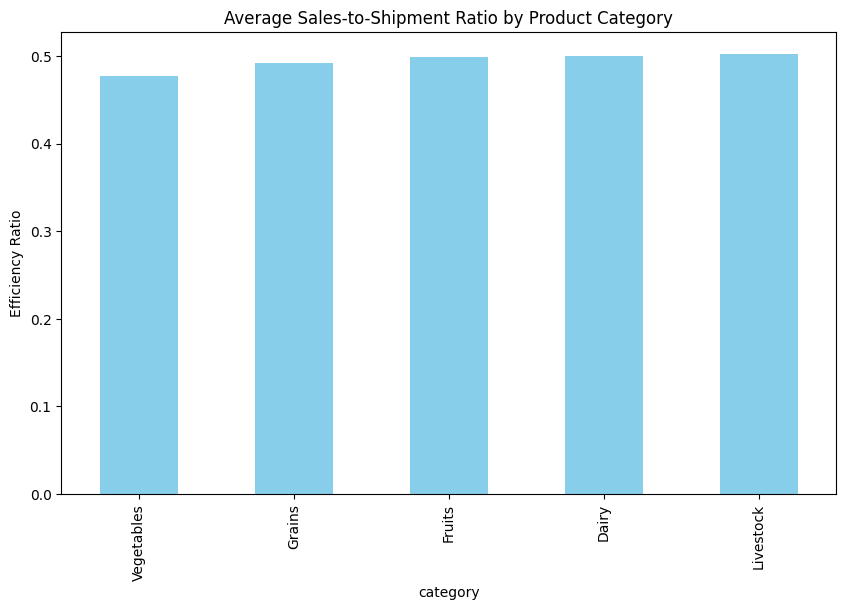

In [19]:
# Group by product
category_eff = df.groupby('category')['sales_to_shipment_ratio'].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
category_eff.plot(kind='bar', color='skyblue')
plt.title("Average Sales-to-Shipment Ratio by Product Category")
plt.ylabel("Efficiency Ratio")
plt.show()


In [20]:
#checking unsold inventory / units_on_hand_kg



# Quick check
print(df[['category','product_name', 'units_shipped_kg', 'units_sold_kg','units_on_hand_kg']].head(10))


     category product_name  units_shipped_kg  units_sold_kg  units_on_hand_kg
0   Livestock         Lamb             19224          14905              4319
1   Livestock         Beef             29504           4550             24954
2      Fruits      Oranges              1838           1722               116
3       Dairy         Milk              6750           1232              5518
4      Fruits      Bananas             48729          47020              1709
5  Vegetables     Potatoes             22600          11477             11123
6  Vegetables     Potatoes             14543           5208              9335
7   Livestock         Pork              8442           7570               872
8      Grains         Rice             23374           7546             15828
9       Dairy         Milk             41999          36611              5388


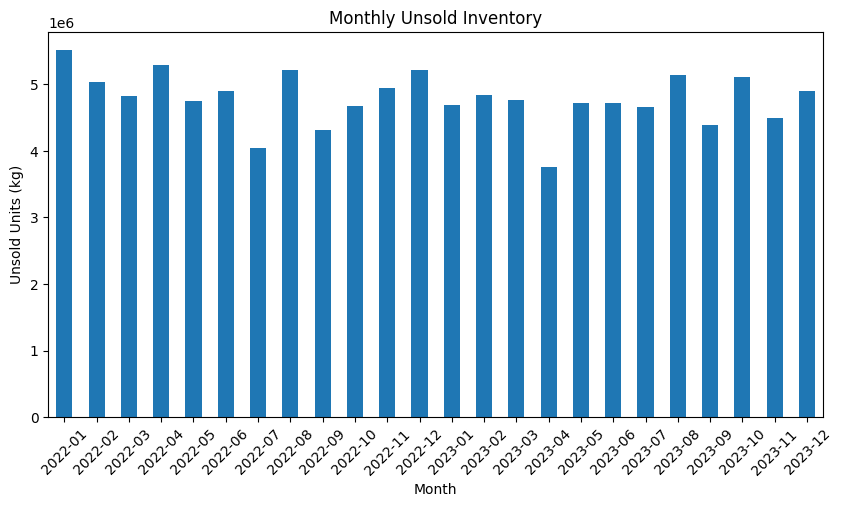

In [21]:
#                  MONTHLY UNSOLD INVENTORY
df['sale_date'] = pd.to_datetime(df['sale_date'])   # replace 'date' with your actual column name
df['month'] = df['sale_date'].dt.to_period('M')

# Aggregate month-wise unsold inventory
monthly_unsold = df.groupby('month')['units_on_hand_kg'].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_unsold.plot(kind='bar')
plt.title("Monthly Unsold Inventory")
plt.ylabel("Unsold Units (kg)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


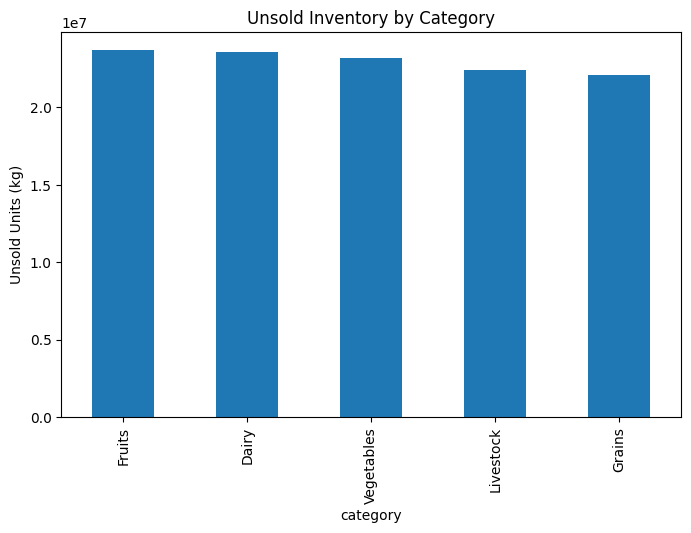

In [22]:
# If you have product categories
category_unsold = df.groupby('category')['units_on_hand_kg'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_unsold.plot(kind='bar')
plt.title("Unsold Inventory by Category")
plt.ylabel("Unsold Units (kg)")
plt.show()


In [23]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='price_per_kg', y='units_on_hand_kg', data=df)
plt.title("Price vs Unsold Inventory")
plt.xlabel("Price per Kg")
plt.ylabel("Unsold Inventory (kg)")
plt.show()


here is no clear linear trend (like "higher price always means more inventory left unsold").

The spread suggests a complex relationship: sometimes high prices leave stock unsold, but sometimes even at low prices, stock remains unsold.

In [24]:
import pandas as pd

# Assuming your data is in a DataFrame called df with columns: 'Price' and 'Unsold_Inventory'
correlation = df['price_per_kg'].corr(df['units_on_hand_kg'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.00911930458822912


Very close to 0 → practically no linear relationship between Price per Kg and Unsold Inventory (kg).

The tiny negative sign (–0.009) suggests that as price increases, unsold inventory decreases slightly, but the effect is so small that it’s basically noise.

In short: Price per Kg alone does not explain why inventory is unsold. Other factors must be driving it (e.g., demand, seasonality, competition, storage, quality).

In [25]:
df['demand_gap'] = df['units_shipped_kg'] - df['units_sold_kg']
print(df[['demand_gap','units_on_hand_kg']].corr())


                  demand_gap  units_on_hand_kg
demand_gap               1.0               1.0
units_on_hand_kg         1.0               1.0


Unsold inventory is mathematically the same as the demand gap. This helps us confirm that our derived metric aligns with reality, and any inventory inefficiency must come from mismatches between supply and actual demand

<Axes: xlabel='sale_date'>

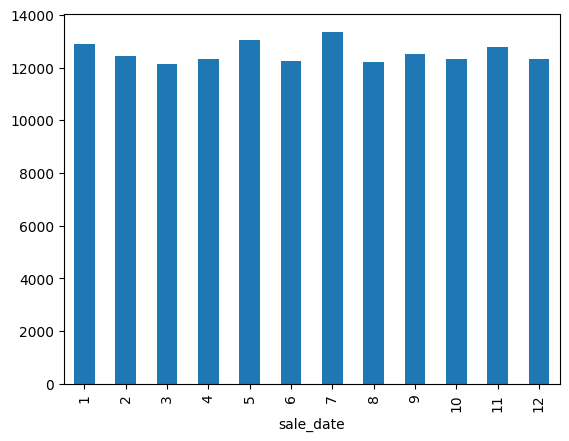

In [26]:
df.groupby(df['sale_date'].dt.month)['units_sold_kg'].mean().plot(kind='bar')


Seasonality significantly affects inventory. During low-demand months, unsold inventory tends to accumulate, so planning should account for seasonal trends

--> seasonality in demand, which can be a reason for unsold inventory variations.

In [27]:
df.groupby('category')[['units_sold_kg','units_on_hand_kg']].mean()


units_sold_kg  units_on_hand_kg
category                                   
Dairy        12688.226394      13012.140806
Fruits       12544.485374      12830.802275
Grains       12620.937428      12805.033024
Livestock    12988.012034      12841.163324
Vegetables   11887.730312      13141.905382

supplier
Fresh Harvest Co.             1956.492205
Organic Meats Co.             1544.878855
Nature's Best Produce         1507.733184
Sunrise Agriculture           1099.823129
Citrus World Inc.              849.871951
Farmers Grain Union            704.426887
Fresh Dairy Farms              626.393939
Organic Valley                 535.872038
Organic Grain Collective       445.555556
Green Valley Farms             414.179487
Berry Fields                   394.454955
Midwest Grains Co.             335.057395
Happy Cows Dairy               261.252252
Golden Orchards                129.704036
Country Fresh Meats            -77.799528
Dairyland Co-op                -93.000000
Orchard Lane Farms            -264.185345
Golden Harvest Agriculture    -753.941315
Ranchers Pride               -1013.152809
Prime Meats LLC              -1122.715640
dtype: float64


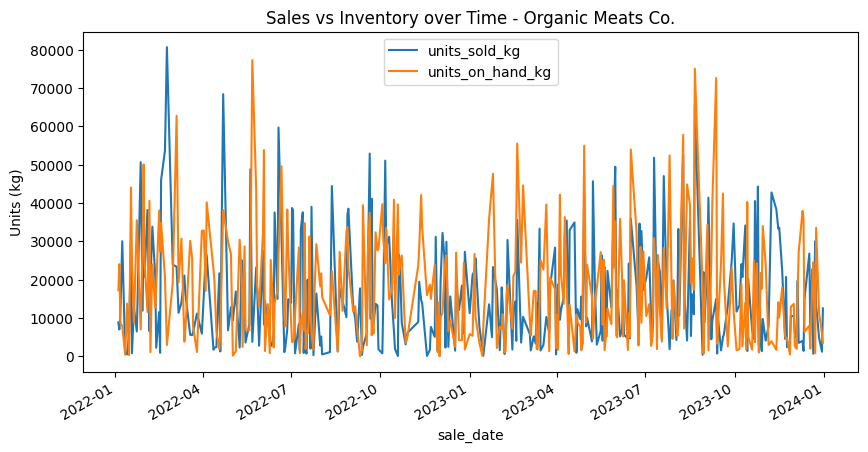

In [28]:
# Average unsold inventory per supplier
supplier_unsold = df.groupby('supplier')['units_on_hand_kg'].mean() - df.groupby('supplier')['units_sold_kg'].mean()
supplier_unsold = supplier_unsold.sort_values(ascending=False)
print(supplier_unsold)

# Bar chart of average unsold inventory per supplier
plt.figure(figsize=(10,6))
sns.barplot(x=supplier_unsold.values, y=supplier_unsold.index, palette="magma")
plt.title('Average Unsold Inventory per Supplier')
plt.xlabel('Units (kg)')
plt.ylabel('Supplier')
plt.show()

# Optional: trend over time for a supplier
supplier_name = 'Organic Meats Co.'  # example
df_supplier = df[df['supplier'] == supplier_name].groupby('sale_date')[['units_sold_kg','units_on_hand_kg']].sum()
df_supplier.plot(figsize=(10,5), title=f'Sales vs Inventory over Time - {supplier_name}')
plt.ylabel('Units (kg)')
plt.show()


In [29]:
df[['price_per_kg','units_sold_kg']].corr()


price_per_kg  units_sold_kg
price_per_kg       1.000000       0.023113
units_sold_kg      0.023113       1.000000

vegetables are overstocked — units on hand are higher than units sold. In contrast, livestock and dairy are more balanced.

Suppliers like Organic Meats Co. and Fresh Harvest Co. consistently have high unsold inventory.


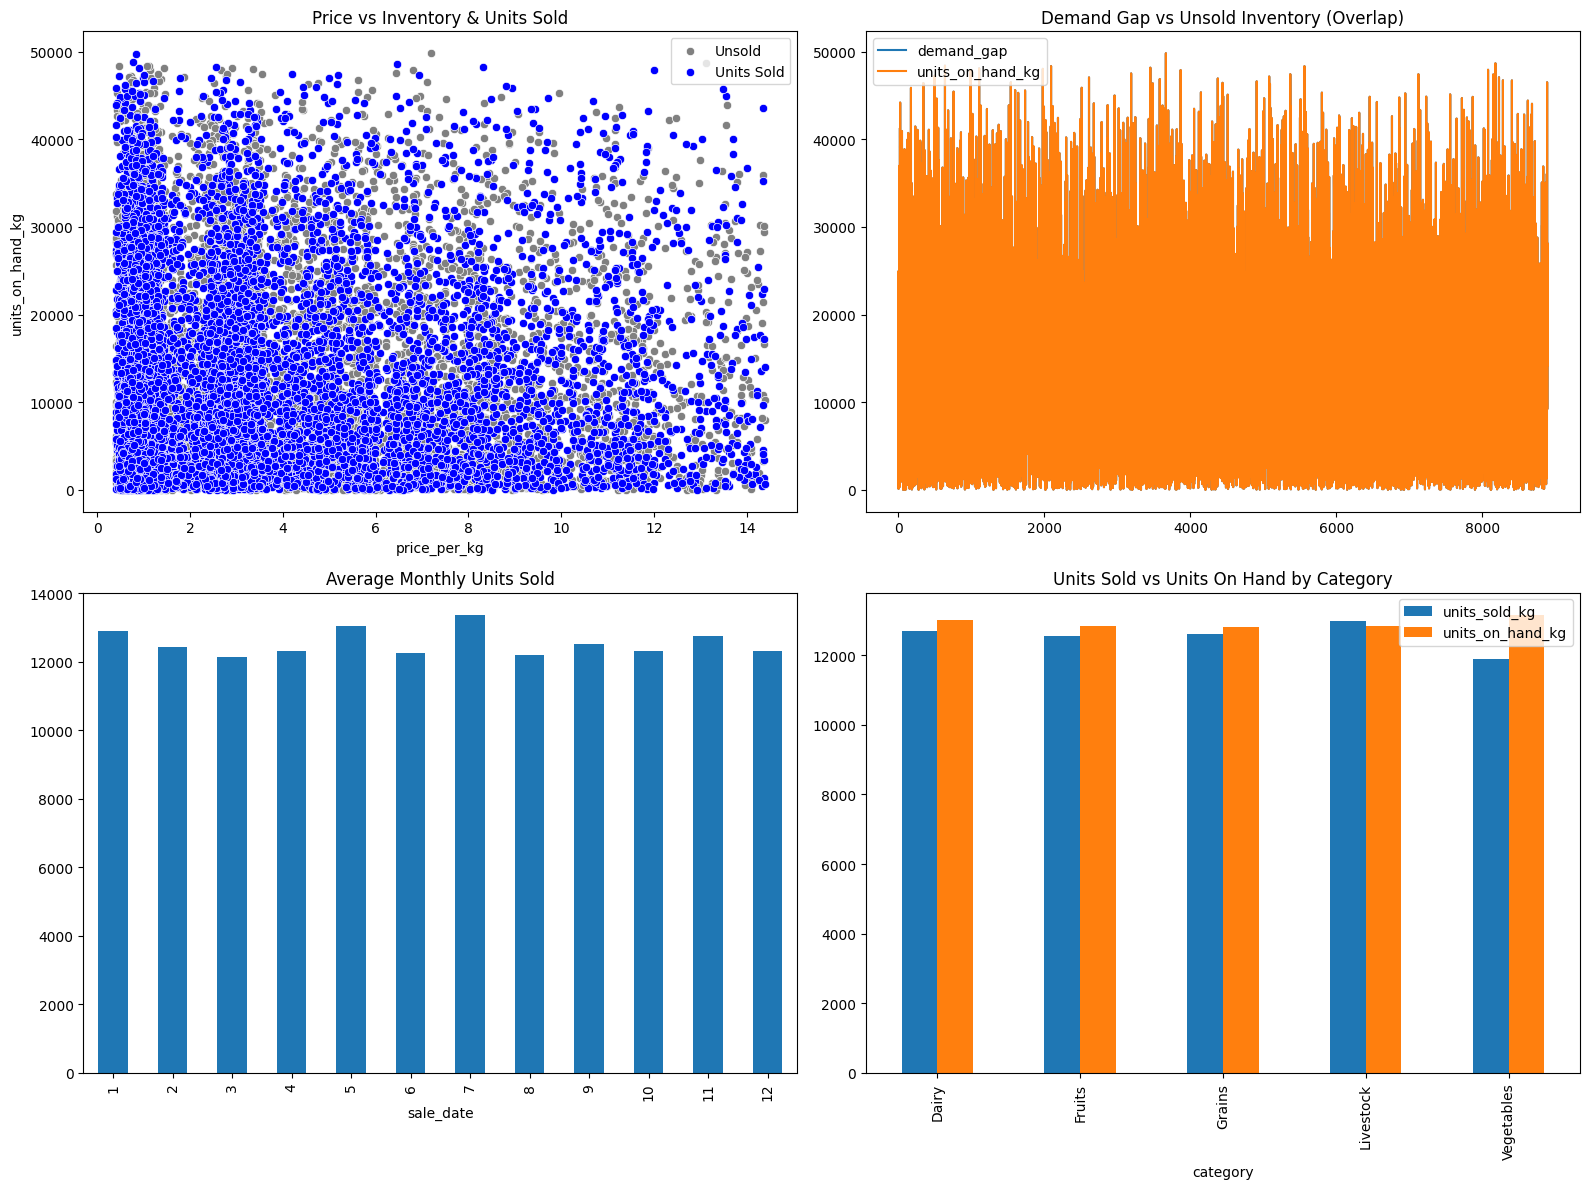

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price vs Unsold Inventory & Units Sold
sns.scatterplot(x='price_per_kg', y='units_on_hand_kg', data=df, ax=axs[0,0], color='gray', label='Unsold')
sns.scatterplot(x='price_per_kg', y='units_sold_kg', data=df, ax=axs[0,0], color='blue', label='Units Sold')
axs[0,0].set_title('Price vs Inventory & Units Sold')
axs[0,0].legend()

# 2. Demand Gap vs Unsold Inventory
df[['demand_gap','units_on_hand_kg']].plot(ax=axs[0,1])
axs[0,1].set_title('Demand Gap vs Unsold Inventory (Overlap)')

# 3. Monthly Sales Trend
df.groupby(df['sale_date'].dt.month)['units_sold_kg'].mean().plot(kind='bar', ax=axs[1,0])
axs[1,0].set_title('Average Monthly Units Sold')

# 4. Category vs Inventory
df.groupby('category')[['units_sold_kg','units_on_hand_kg']].mean().plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title('Units Sold vs Units On Hand by Category')

plt.tight_layout()
plt.show()


First, I looked at how price affects sales and inventory. As you can see here, there’s practically no correlation — price doesn’t seem to drive units sold or unsold inventory. This tells us that adjusting price alone won’t solve overstock issues.

Next, I compared the demand gap, which is units shipped minus units sold, with unsold inventory. The two overlap perfectly, which makes sense mathematically — unsold inventory is essentially the demand gap.

Then, I examined seasonality. Monthly sales fluctuate significantly, with some months much higher than others. This explains why inventory accumulates in low-demand months and highlights the need for seasonal planning.

Finally, I analyzed categories and suppliers. Vegetables, for example, are overstocked — units on hand exceed units sold. Additionally, certain suppliers consistently contribute the most to unsold inventory, indicating areas to focus on for efficiency improvements.

In summary, price is not the main factor. Instead, inventory optimization should focus on demand forecasting, seasonal planning, category management, and supplier performance.

In [31]:
# Ensure numeric columns are int64 or float64
numeric_cols = ['units_shipped_kg', 'units_sold_kg', 'price_per_kg']
df[numeric_cols] = df[numeric_cols].astype('float64')
df['units_on_hand_kg'] = df['units_on_hand_kg'].astype('float64')


In [32]:
pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your data
# df = pd.read_csv("your_file.csv")

# Create a profile report
profile = ProfileReport(df, title="Data Analysis Report", explorative=True)

# Save the report to HTML
profile.to_file("profiling_report.html")

# Or display in Jupyter Notebook directly
profile.to_notebook_iframe()




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 35.93it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 9 ... 0 9 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 6 7 ... 7 1 8]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

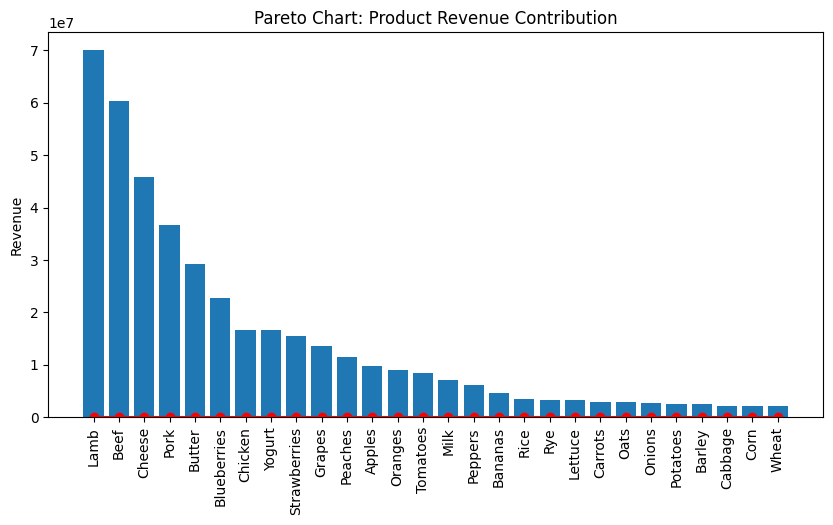

In [34]:
# Calculate revenue
df['revenue'] = df['units_sold_kg'] * df['price_per_kg']

# Revenue by category
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

# Bar chart: Revenue by category
plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='Blues_r')
plt.title('Revenue by Category')
plt.ylabel('Revenue')
plt.show()

# Pareto chart: Top 20% products contributing 80% revenue
product_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False)
cumulative = product_revenue.cumsum() / product_revenue.sum()
plt.figure(figsize=(10,5))
plt.bar(product_revenue.index, product_revenue.values)
plt.plot(product_revenue.index, cumulative, color='red', marker='o')
plt.xticks(rotation=90)
plt.title('Pareto Chart: Product Revenue Contribution')
plt.ylabel('Revenue')
plt.show()


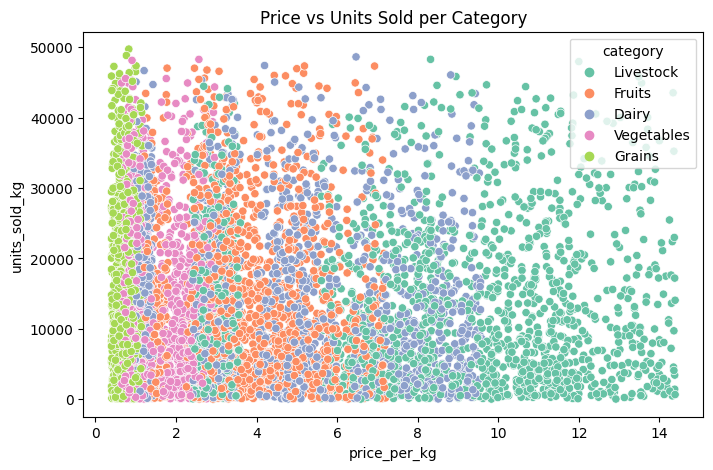

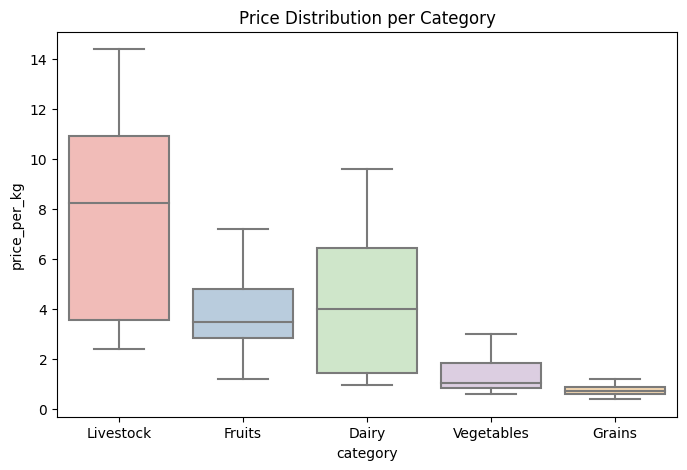

In [35]:
# Average price vs units sold per category
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='price_per_kg', y='units_sold_kg', hue='category', palette='Set2')
plt.title('Price vs Units Sold per Category')
plt.show()

# Boxplot of price per category
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='category', y='price_per_kg', palette='Pastel1')
plt.title('Price Distribution per Category')
plt.show()


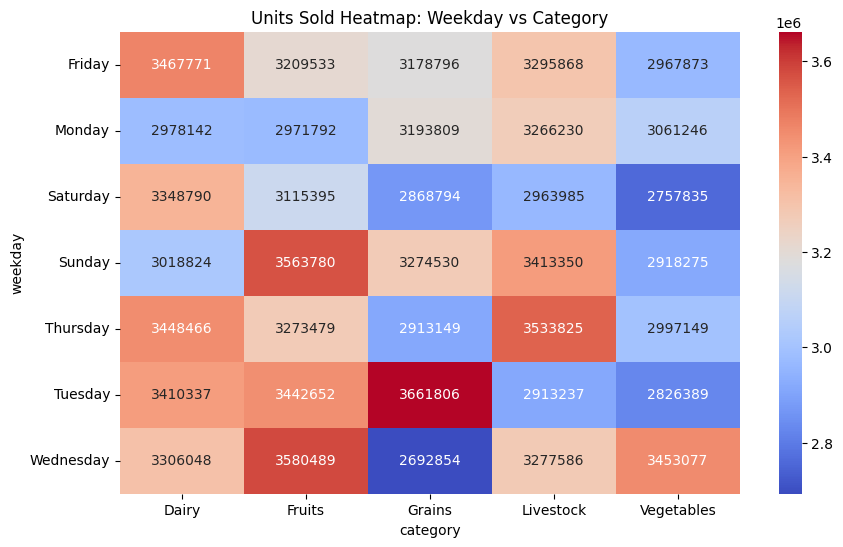

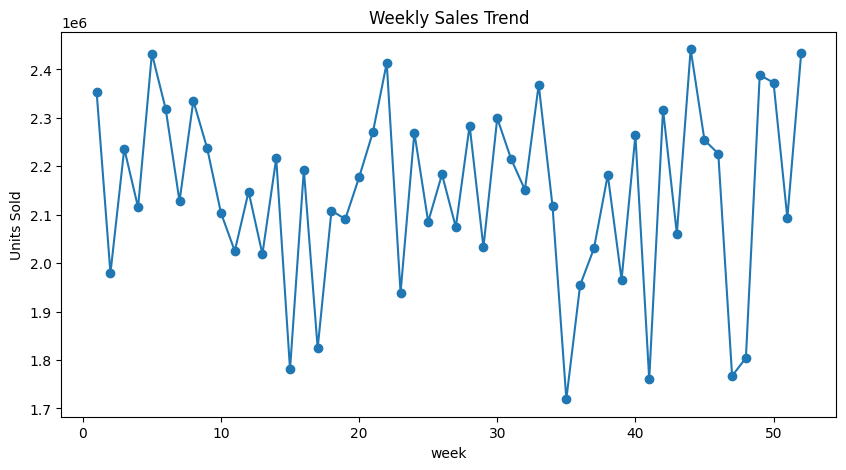

In [36]:
# Extract weekday and week
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['weekday'] = df['sale_date'].dt.day_name()
df['week'] = df['sale_date'].dt.isocalendar().week

# Heatmap: Weekday vs Category sales
weekday_category = df.pivot_table(index='weekday', columns='category', values='units_sold_kg', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(weekday_category, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Units Sold Heatmap: Weekday vs Category')
plt.show()

# Line plot: Weekly sales trend
weekly_sales = df.groupby('week')['units_sold_kg'].sum()
plt.figure(figsize=(10,5))
weekly_sales.plot(marker='o')
plt.title('Weekly Sales Trend')
plt.ylabel('Units Sold')
plt.show()


               Key Insights from Inventory & Sales Analysis
* Price alone doesn’t drive sales: Correlation analysis shows little to no           relationship between product price and unsold inventory.
* Overstocking & understocking are common: Units shipped often exceed units sold,     leading to excess inventory, wastage, and higher storage costs.
* Seasonal and supplier factors matter: Inventory mismanagement is influenced by     seasonal variability and supplier behavior—some ship too much, some too little     relative to demand.
* Monthly trends vary: Seasonality impacts both supply and demand, highlighting the need for season-aware inventory planning.
* Revenue varies by category:
 Highest revenue: Livestock (price increases correlate with higher units sold)
 Followed by: Dairy → Fruits → Vegetables → Grains
 Grains generate the least revenue.
  
**Actionable takeaway: Optimize shipments based on sales trends and seasonal demand, focus on high-revenue products, and correct inventory mismanagement to reduce wastage and improve profitability.**


